## Worldclim data for Post 1982 soil pits

Method based loosely on this SE answer: https://gis.stackexchange.com/a/227595

WorldClim website: http://worldclim.org/

Citation: 

[_Hijmans, R.J., S.E. Cameron, J.L. Parra, P.G. Jones and A. Jarvis, 2005. Very high resolution interpolated climate surfaces for global land areas. International Journal of Climatology 25: 1965-1978._](http://onlinelibrary.wiley.com/doi/10.1002/joc.1276/pdf)

In [78]:
library(raster)
library(sp)

# I think this is WorldClim version 1.4 data???
# Currently using 2.5 minute dataset (5km res), using 0.5 (1km) will 
# require looping through tiles I think.
r <- getData("worldclim",var="bio",res=2.5)

In [79]:
# Pull mean temperature (1) and precipitation (12) out of the dataset
r <- r[[c(1,12)]]
names(r) <- c("Temp","Prec")

In [ ]:
# Get a set of random points
points <- spsample(as(r@extent, 'SpatialPolygons'),n=100, type="random")  

In [80]:
# Get the points from the Post dataset
library(readr)
points_txt <- read_csv('~/rawdata/Post1982_pitlocs_Greg-2.csv', skip=3)
# There is no sign on the latitude coordinates, so need to alter sign for 
# points where N_S column == S
# Some N_S values are NA - first change them to N (they are 0,0 anyway)
points_txt <- subset(points_txt, !is.na(points_txt$N_S))
# Then change sign
points_txt$Latitude[points_txt$N_S=='S'] = -points_txt$Latitude[points_txt$N_S=='S']
points_txt$Longitude[points_txt$E_W=='W'] = -points_txt$Longitude[points_txt$E_W=='W']
# And create SpatialPoints object
coords <- data.frame(x=points_txt$Longitude,y=points_txt$Latitude)
points <- SpatialPoints(coords, proj4string = r@crs)


Parsed with column specification:
cols(
  Continent = col_integer(),
  Group = col_integer(),
  Profile = col_integer(),
  Orig_Number = col_character(),
  NumType = col_integer(),
  Latitude = col_double(),
  N_S = col_character(),
  Longitude = col_double(),
  E_W = col_character()
)


In [81]:
head(points)

SpatialPoints:
           x    y
[1,] -105.85 39.8
Coordinate Reference System (CRS) arguments: +proj=longlat +datum=WGS84
+ellps=WGS84 +towgs84=0,0,0 

In [82]:
# Extract values from raster
values <- extract(r,points)
# Divide Temp by 10
values[,'Temp'] <- values[,'Temp']/10
# Make a dataframe
df <- cbind.data.frame(coordinates(points),values, points_txt)

In [83]:
tail(df)
write_csv(df, '~/rawdata//Post1982_Climate_Greg-2.csv')

,x,y,Temp,Prec,Continent,Group,Profile,Orig_Number,NumType,Latitude,N_S,Longitude,E_W
4258,-151.50,59.6000,NA,NA,0,64,39,60-AK-4-3,5,59.6000,N,-151.50,W
4259,-151.50,59.6000,NA,NA,0,64,40,60-AK-4-4,5,59.6000,N,-151.50,W
4260,-156.31,20.8200,19.1,2376,7,4,7,65-HA-4-23,5,20.8200,N,-156.31,W
4261,-156.40,20.6667,20.4,962,7,4,8,65-HA-4-22,5,20.6667,N,-156.40,W
4262,-155.50,20.0000,15.8,1152,7,4,9,62-HA-1-1,5,20.0000,N,-155.50,W
4263,-155.39,19.9100,10.3,1056,7,4,10,65-HA-1-13,5,19.9100,N,-155.39,W


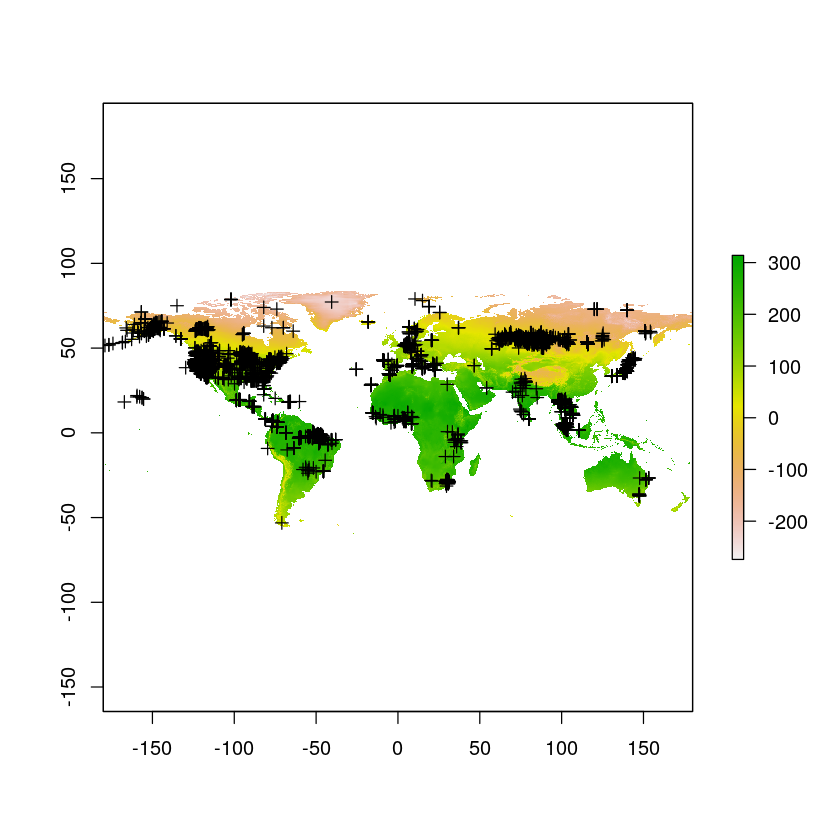

In [85]:
plot(r[[1]])
plot(points,add=T)